In [7]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

output_path = "."
RANDOM_STATE = 1234


In [8]:
def find_embedding_for_property(property_df,street_df,emb_df):
    street_with_embedding = street_df.merge(emb_df, left_index=True, right_index=True)
    output_df = property_df.merge(street_with_embedding,on=["street_sources","street_targets"])
    return output_df


In [9]:
akl_embedding_df = pd.read_csv(f"./outputs/akl_embedding_1668394483.csv")
AKL_df = pd.read_csv(f"{output_path}/datasets/property_data_with_street.csv",encoding='latin1')
AKL_df = AKL_df.drop(['Unnamed: 0'],axis=1)
embedding_size = akl_embedding_df.shape[1]

akl_embedding_df.columns = ['street_embedding_'+str(i) for i in range(embedding_size)]
akl_street_nodes_df = pd.read_csv(f"{output_path}/datasets/akl_street_nodes.csv")
akl_street_nodes_df = akl_street_nodes_df.rename(columns={"source": "street_sources", "target": "street_targets"})

AKL_df = find_embedding_for_property(AKL_df,akl_street_nodes_df,akl_embedding_df)

In [10]:
tsne_embedding_df = AKL_df[AKL_df.columns.intersection(akl_embedding_df.columns)]
print(tsne_embedding_df.shape)

(40938, 16)


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 40938 samples in 0.001s...


/run/media/yunchen/lacie/projects/uoa_789_conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 40938 samples in 0.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40938
[t-SNE] Computed conditional probabilities for sample 2000 / 40938
[t-SNE] Computed conditional probabilities for sample 3000 / 40938
[t-SNE] Computed conditional probabilities for sample 4000 / 40938
[t-SNE] Computed conditional probabilities for sample 5000 / 40938
[t-SNE] Computed conditional probabilities for sample 6000 / 40938
[t-SNE] Computed conditional probabilities for sample 7000 / 40938
[t-SNE] Computed conditional probabilities for sample 8000 / 40938
[t-SNE] Computed conditional probabilities for sample 9000 / 40938
[t-SNE] Computed conditional probabilities for sample 10000 / 40938
[t-SNE] Computed conditional probabilities for sample 11000 / 40938
[t-SNE] Computed conditional probabilities for sample 12000 / 40938
[t-SNE] Computed conditional probabilities for sample 13000 / 40938
[t-SNE] Computed conditional probabilities for sample 14000 / 40938

<Figure size 4500x4500 with 0 Axes>

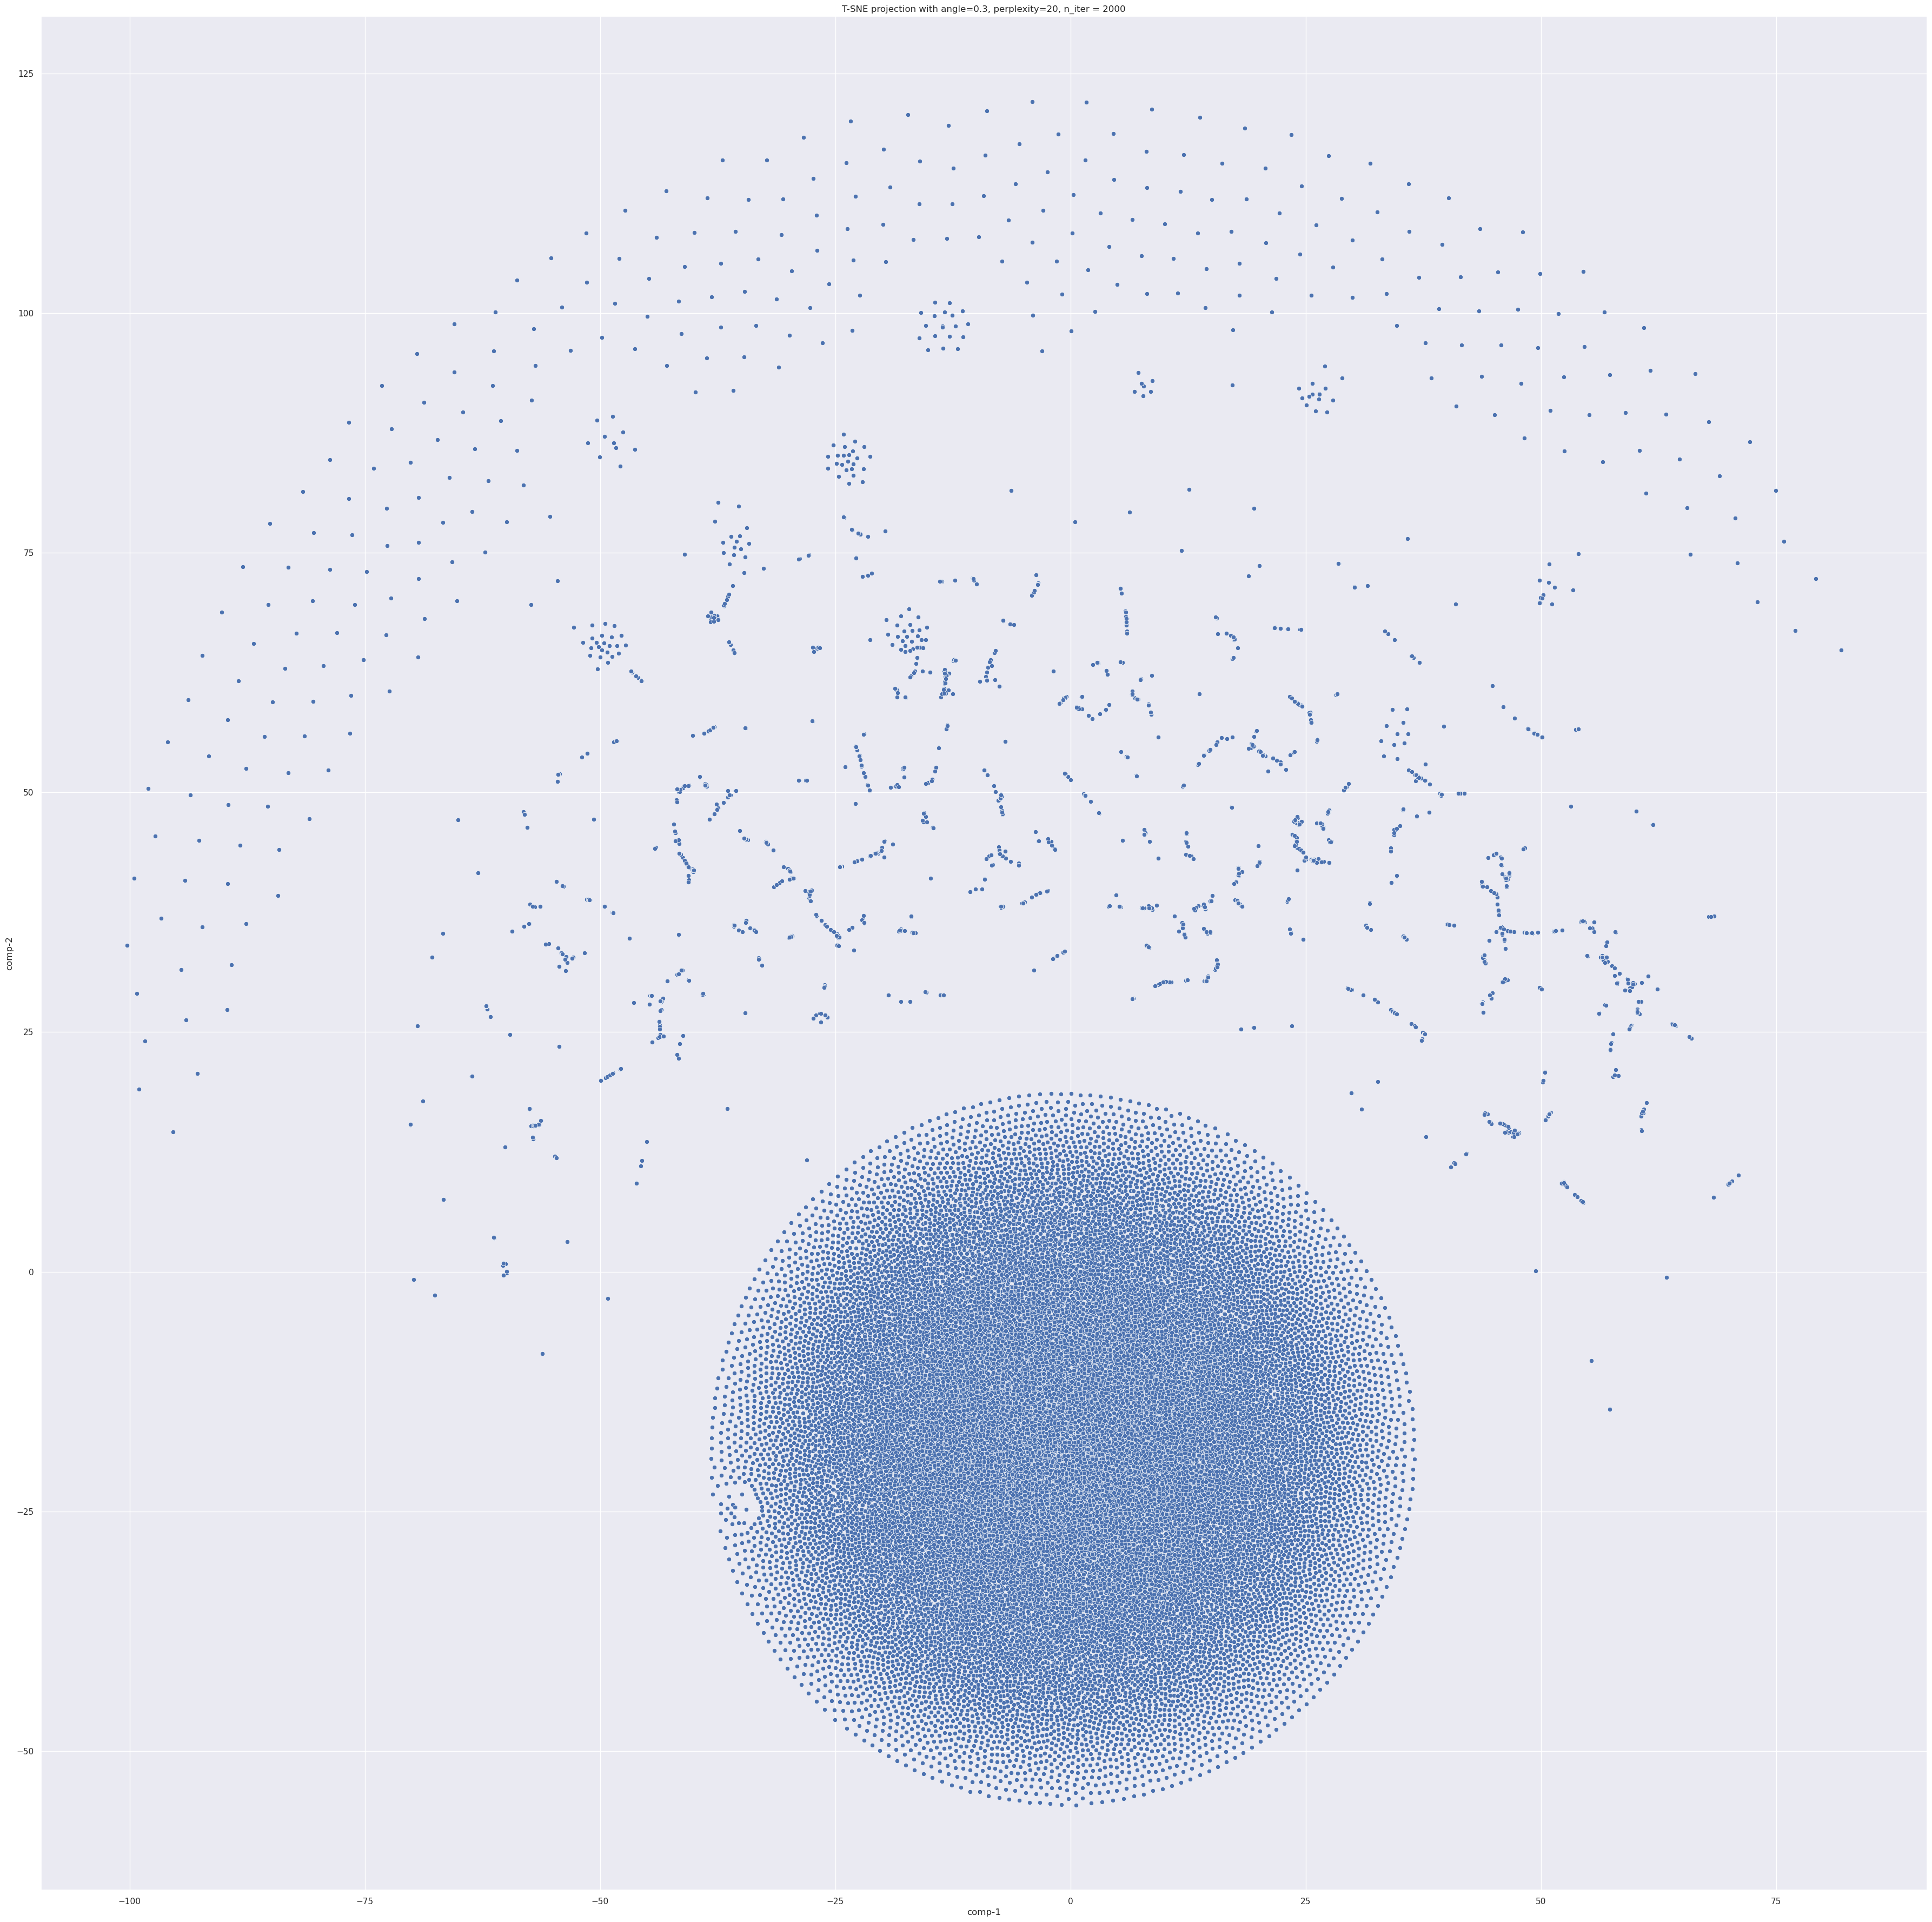

In [11]:
tsne_embedded = TSNE(n_components=2,learning_rate='auto',angle=0.3,n_iter=2000, perplexity=10,random_state=RANDOM_STATE,verbose=1,n_jobs=-1).fit_transform(tsne_embedding_df.copy())

df = pd.DataFrame()
df["comp-1"] = tsne_embedded[:,0]
df["comp-2"] = tsne_embedded[:,1]
plt.clf()
plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", data=df).set(title=f"T-SNE projection with angle=0.3, perplexity={20}, n_iter = {2000}")
plt.savefig(f"./outputs/visualized_embedding_final.pdf")

6594091693,6594091692 Ambar Ridge Avenue
4461282699,4451398279 Vinistra Road
25884133,25884134 Sollum Road

热闹点
10012449544,10012449547 Vincent Street
25978336,25978343 Dominion Road
2746482044,7704797146 Khyber Pass Road

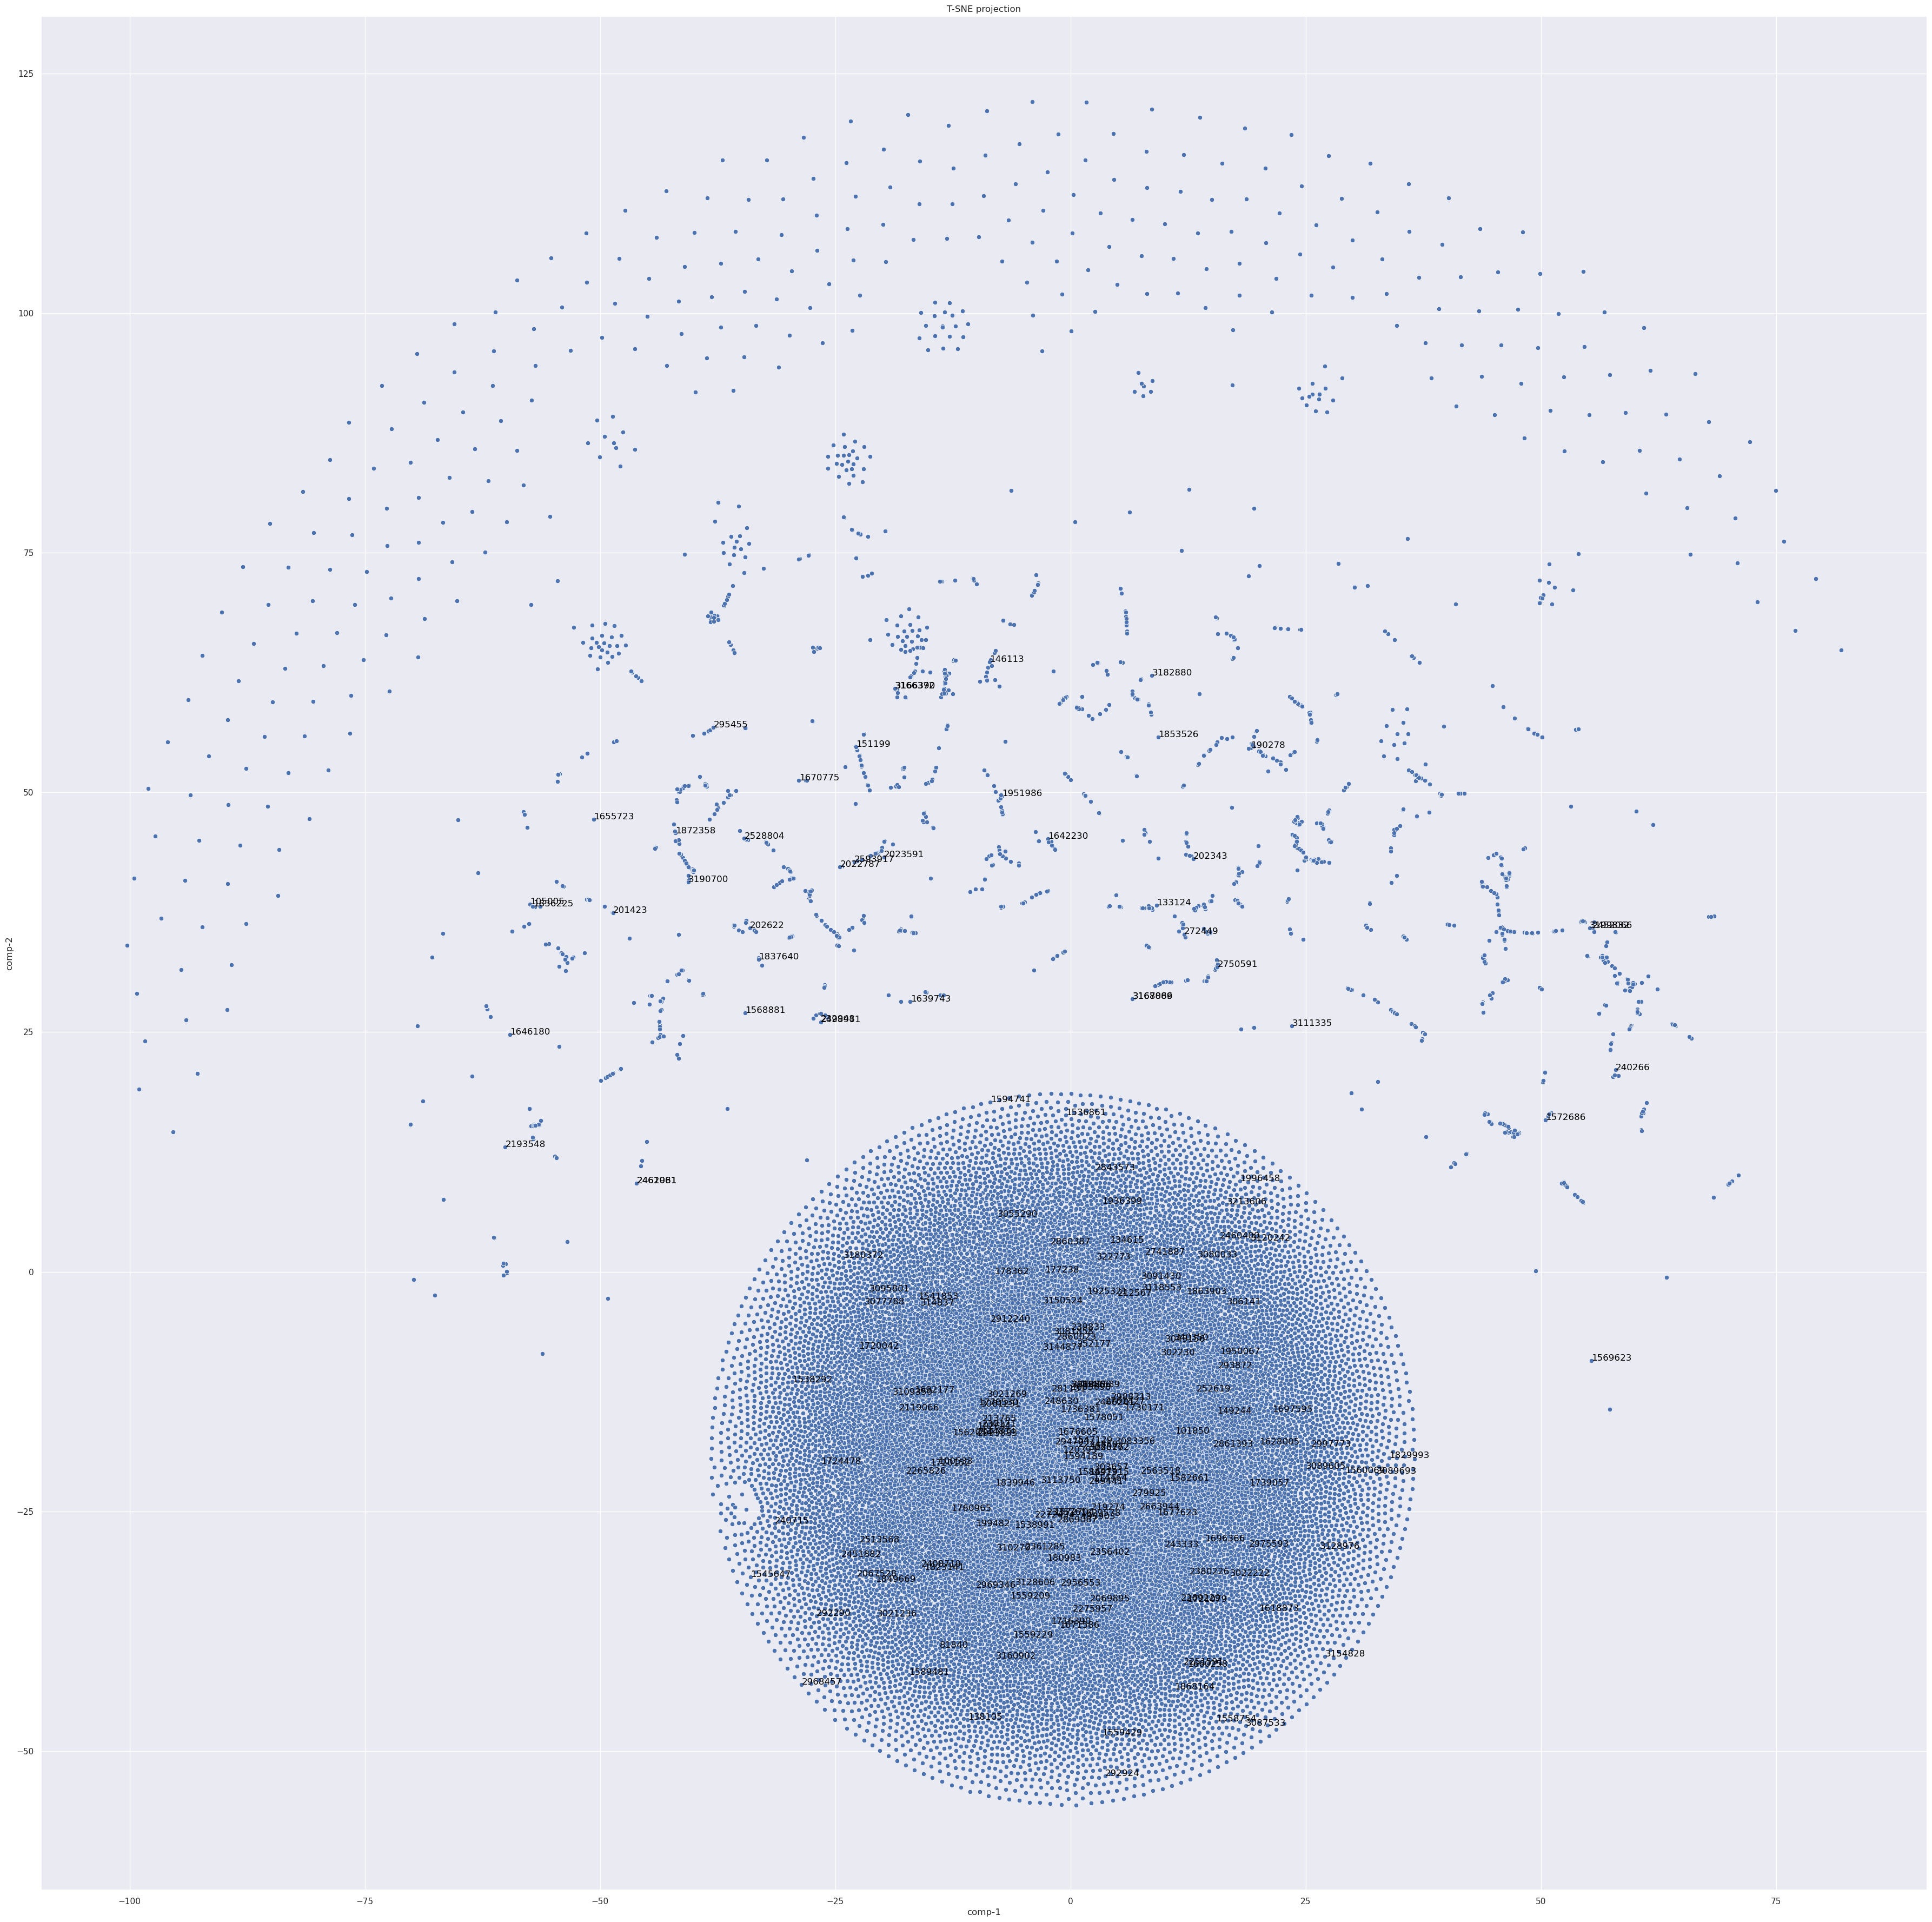

In [13]:
df = pd.DataFrame()
df["comp-1"] = tsne_embedded[:,0]
df["comp-2"] = tsne_embedded[:,1]

fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(45,45)})
sns.scatterplot(x="comp-1", y="comp-2", data=df).set(title="T-SNE projection")

cleaned_property_df = pd.read_csv(f"{output_path}/datasets/cleaned_property_data.csv",encoding='latin1')
sampled_index = AKL_df.sample(200,random_state=RANDOM_STATE)
output_dict={}
for i,data in sampled_index.iterrows():
    point = df.iloc[i]
    ax.text(point['comp-1']+.02, point['comp-2'], data["CL_QPID"],color='Black')
    prop = cleaned_property_df[cleaned_property_df["CL_QPID"] == data["CL_QPID"]]
    output_dict[data["CL_QPID"]]=(prop["CL_Latitude"].tolist()[0],prop["CL_Longitude"].tolist()[0])

import json
with open('./outputs/case_study_with_amenity_filters/property_location.json', 'w') as file:
     file.write(json.dumps(output_dict))
